In [1]:
%load_ext autoreload
%autoreload 1
%aimport coma.utils.visualise

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# setup enviornment for interactive plotting
# !apt-get install -qq xvfb
import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

import pyvista as pv

pv.set_plot_theme("document")

brain1 = pv.read('/vol/biomedic3/bglocker/brainshapes/1000596/T1_first-BrStem_first.vtk')
brain3 = pv.read('/vol/biomedic3/bglocker/brainshapes/1009767/T1_first-BrStem_first.vtk')

dist = np.sqrt(((brain1.points - brain3.points) ** 2).sum(axis=1))
dist = (dist - dist.min()) / (dist.max() - dist.min())

brain1['distance'] = dist

In [3]:
from coma.utils.visualise import plot_mesh_pyvista

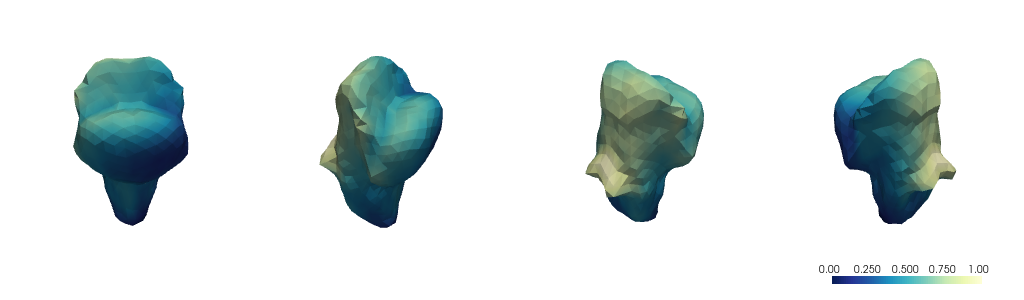

[(31.927315305141008, -0.5119337335552814, 176.20541245785097),
 (-78.96514701843262, -111.4043960571289, 65.31295013427734),
 (0.0, 0.0, 1.0)]

In [6]:
plotter = pv.Plotter(
    shape=(1, 4),
    window_size=(1024, 300),
    border=False,
    lighting='light_kit',
    off_screen=True,
    notebook=True,
)

plot_mesh_pyvista(
    plotter,
    brain1,
    rotations=[(0, 0, -45), (0, 0, 20), (0, 0, 85), (0, 0, 185),],
    vertexcolors=list(dist),
    vertexscalar='distance',
    title="",
)

plotter.show()